In [ ]:
import pandas as pd

df = pd.read_csv('/content/traffic.csv')
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70630 entries, 0 to 70629
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   event    70630 non-null  object
 1   date     70630 non-null  object
 2   country  70629 non-null  object
 3   city     70629 non-null  object
 4   artist   70619 non-null  object
 5   album    70629 non-null  object
 6   track    70628 non-null  object
 7   isrc     68406 non-null  object
 8   linkid   70629 non-null  object
dtypes: object(9)
memory usage: 4.8+ MB


,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [ ]:
# Check structure
df.info()
print("\nMissing values:\n", df.isnull().sum())

# Remove exact duplicate rows
df.drop_duplicates(inplace=True)

df.dropna(subset=['country', 'artist', 'track'], inplace=True)

df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70630 entries, 0 to 70629
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   event    70630 non-null  object
 1   date     70630 non-null  object
 2   country  70629 non-null  object
 3   city     70629 non-null  object
 4   artist   70619 non-null  object
 5   album    70629 non-null  object
 6   track    70628 non-null  object
 7   isrc     68406 non-null  object
 8   linkid   70629 non-null  object
dtypes: object(9)
memory usage: 4.8+ MB

Missing values:
 event         0
date          0
country       1
city          1
artist       11
album         1
track         2
isrc       2224
linkid        1
dtype: int64


(42278, 9)

In [ ]:
print("Total Events (rows):", len(df))
print("Unique Countries:", df['country'].nunique())
print("Unique Artists:", df['artist'].nunique())
print("Unique Tracks:", df['track'].nunique())


Total Events (rows): 42278
Unique Countries: 204
Unique Artists: 1542
Unique Tracks: 2137


In [ ]:
df.to_csv('/content/cleaned_traffic_data.csv', index=False)
print("Saved cleaned_traffic_data.csv")


✅ Saved cleaned_traffic_data.csv


<Axes: title={'center': 'Top 10 Countries by Clicks'}, xlabel='country'>

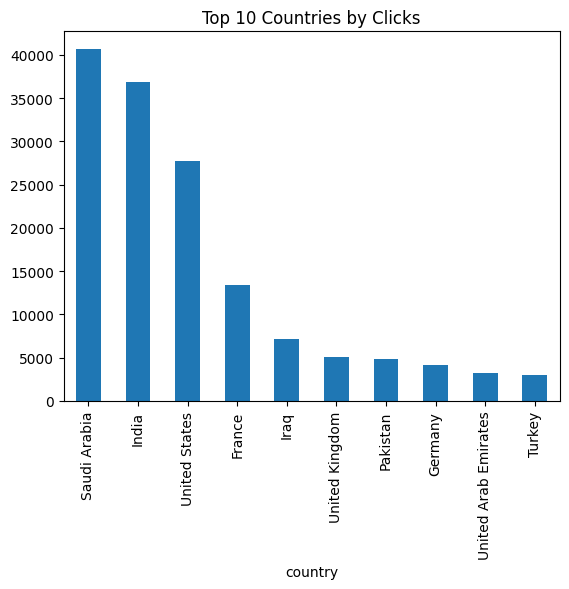

In [ ]:
# Top 10 countries by clicks
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', title='Top 10 Countries by Clicks')


/tmp/ipython-input-2477936123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=track_clicks.values, y=track_clicks.index, palette='viridis')


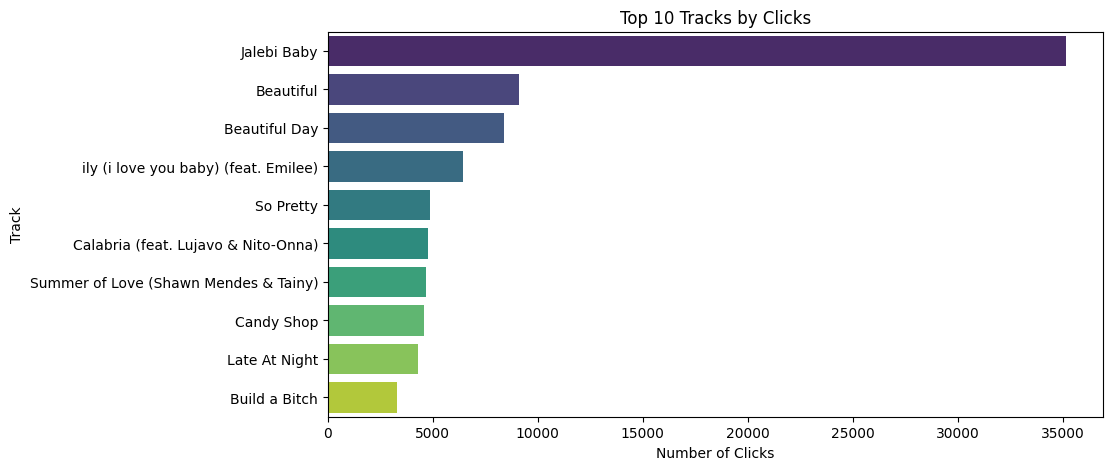

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
track_clicks = df['track'].value_counts().head(10)
sns.barplot(x=track_clicks.values, y=track_clicks.index, palette='viridis')
plt.title("Top 10 Tracks by Clicks")
plt.xlabel("Number of Clicks")
plt.ylabel("Track")
plt.show()

/tmp/ipython-input-881466838.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_clicks.values, y=artist_clicks.index, palette='mako')


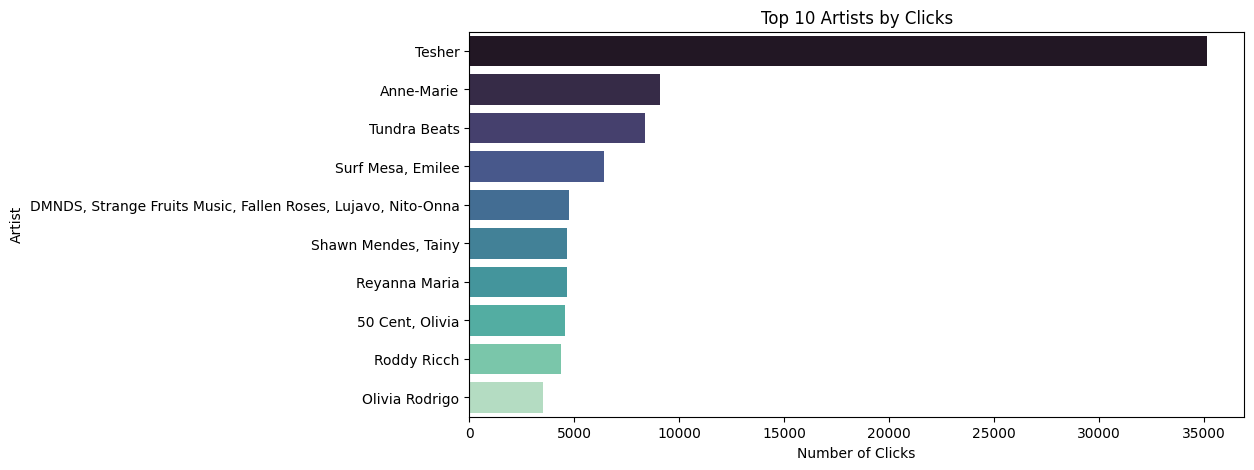

In [ ]:

plt.figure(figsize=(10,5))
artist_clicks = df['artist'].value_counts().head(10)
sns.barplot(x=artist_clicks.values, y=artist_clicks.index, palette='mako')
plt.title("Top 10 Artists by Clicks")
plt.xlabel("Number of Clicks")
plt.ylabel("Artist")
plt.show()